In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark") # Theme for plots as Dark
sns.set_palette("copper")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [35]:
data = pd.read_csv("/content/train.csv",index_col="id")
data = data[:10000]

data.drop(["Surname","Gender","Geography"],inplace=True,axis=1)
data.head(10)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,
0,15674932,668,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,627,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,678,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,716,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,15771669,588,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,15692819,593,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,15669611,678,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,15691707,676,43.0,4,0.00,2,1.0,0.0,142917.13,0


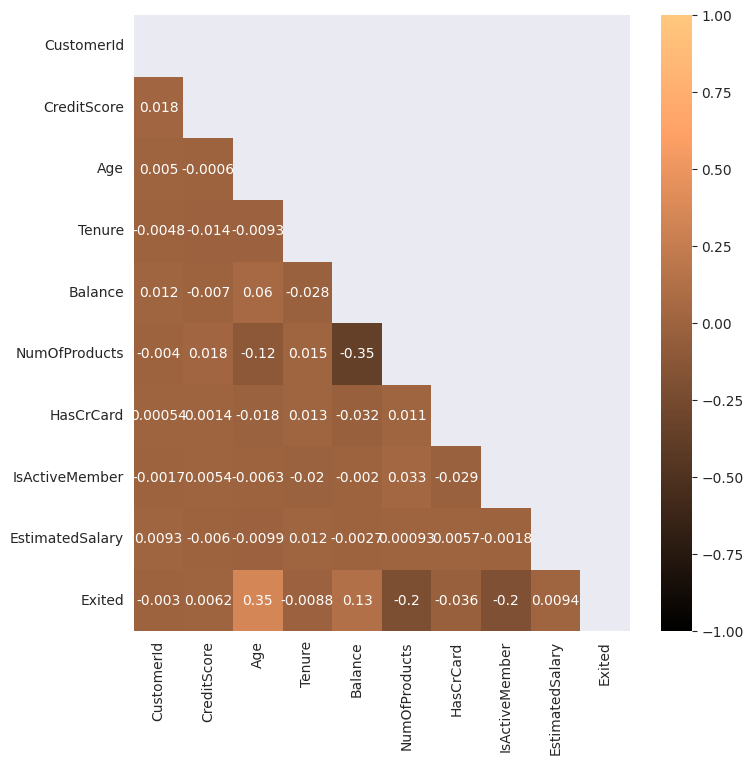

In [42]:
mask = np.triu(np.ones_like(data.corr()))
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), cmap="copper", annot=True, mask=mask,vmin=-1,vmax=1);

In [43]:
X = data.drop("Exited",axis=1)
y = data.Exited

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3)
print(len(X_train),len(X_val))

7000 3000


In [45]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
ITERATIONS = 20

def fitnessFunction(k, C, g):
  svm = SVC(kernel=k, C=C, gamma=g, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_val)
  return accuracy_score(y_pred, y_val)

metrics = pd.DataFrame(columns=['S_No', 'Best_Acc', 'Best_Kernel', 'Best_Nu', 'Best_Epsilon'])

best_acc = 0
best_C = 0
best_g = 0

for i in range(ITERATIONS):

  for kernel in kernels:
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)

    if score>best_acc:
      best_acc = round(score, 2)
      best_C = round(C, 2)
      best_g = round(gamma, 2)
      best_kernel = kernel

  print(f'Best Accuracy till iteration_{i} = {best_acc}')
  metrics.loc[i] = [i+1, best_acc, best_kernel, best_C, best_g]

Best Accuracy till iteration_0 = 0.69
Best Accuracy till iteration_1 = 0.76
Best Accuracy till iteration_2 = 0.8
Best Accuracy till iteration_3 = 0.8
Best Accuracy till iteration_4 = 0.8
Best Accuracy till iteration_5 = 0.8
Best Accuracy till iteration_6 = 0.8
Best Accuracy till iteration_7 = 0.8
Best Accuracy till iteration_8 = 0.82
Best Accuracy till iteration_9 = 0.82
Best Accuracy till iteration_10 = 0.82
Best Accuracy till iteration_11 = 0.82
Best Accuracy till iteration_12 = 0.82
Best Accuracy till iteration_13 = 0.82
Best Accuracy till iteration_14 = 0.82
Best Accuracy till iteration_15 = 0.82
Best Accuracy till iteration_16 = 0.82
Best Accuracy till iteration_17 = 0.82
Best Accuracy till iteration_18 = 0.82
Best Accuracy till iteration_19 = 0.82


In [46]:
metrics

,S_No,Best_Acc,Best_Kernel,Best_Nu,Best_Epsilon
0,1,0.69,sigmoid,0.93,3.53
1,2,0.76,rbf,5.55,9.53
2,3,0.80,rbf,0.80,1.31
3,4,0.80,rbf,0.80,1.31
4,5,0.80,rbf,0.80,1.31
5,6,0.80,rbf,0.80,1.31
6,7,0.80,rbf,0.80,1.31
7,8,0.80,rbf,0.80,1.31
8,9,0.82,rbf,1.17,0.52
9,10,0.82,rbf,1.17,0.52


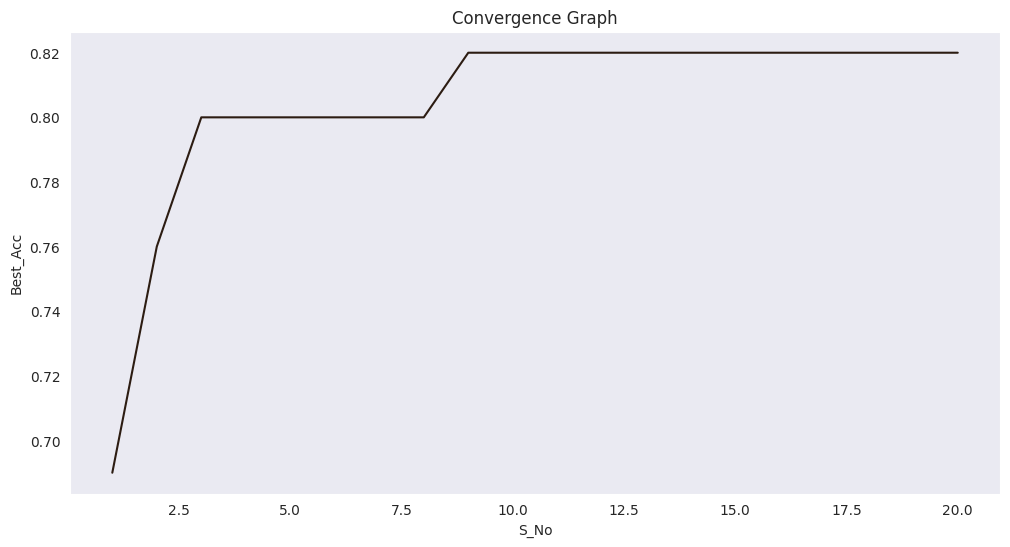

In [52]:
plt.figure(figsize=(12,6))
sns.lineplot(metrics,y ="Best_Acc",x= "S_No")
plt.title("Convergence Graph");